# General Solution for Coupled Oscillators 
For the system given below
<p style="float:center">
    <img src="../Theoretical-Calculation/System-Figure/figure.svg" width="350px">
</p>

where two masses denote $m_1$ and $m_2$, three springs constant are given by $k_1$, $k_2$ and $k_3$.

After solving the Euler-Lagrangian equations, we have the system for second order odinary differential equation

$$
\frac{d^2}{dt^2}\begin{pmatrix}x_1\\x_2\end{pmatrix}
=
\begin{pmatrix}
\displaystyle - \frac{k_1+k_2}{m_1}	&\displaystyle  \frac{k_2}{m_1}\\[2ex]
\displaystyle  \frac{k_2}{m_2} 		&\displaystyle  -\frac{k_2+k_3}{m_2}
\end{pmatrix} \begin{pmatrix}x_1\\x_2\end{pmatrix},
$$

Denoting the position vector as $\vec{x}$, which is 

$$
\vec{x} = \vec{x}\left(t\right) = 
\begin{pmatrix}
x_{1}\left(t\right)\\ 
x_{2}\left(t\right)
\end{pmatrix},
$$

the equation becomes $\displaystyle \frac{d^2}{dt^2}\vec{x} = \mathcal{F}\,\vec{x}$, where $\mathcal{F}$ is the 2 by 2 matrix.


Then the general solution for this system is

$$
\vec{x}\left(t\right) = \sum_{i=1}^{2}\left(A_{i}e^{\omega_{i}t}+B_{i}e^{-\omega_{i}t}\right)\vec{\mu}_i,
$$

where $A_{i}$, $B_{i}$ are the constant determined by initia value, and $\omega_{i}$ and $\vec{\mu}$ are the eigen-frequencies and eigen-vectors, respectively. The eigen-values for the matrix $\mathcal{F}$ are 

$$
\lambda_i = \frac{\mathrm{tr}\left(\mathcal{F}\right) \pm \sqrt{\mathrm{tr}\left(\mathcal{F}\right)^2-4\det\left(\mathcal{F}\right)}}{2}, \quad i=1,2
$$

inside $\mathrm{tr}\left(\mathcal{F}\right)$ and $\det\left(\mathcal{F}\right)$ are the Trace and Determinant of matrix which are given by

$$
\begin{aligned}
\mathrm{tr}(\mathcal{F}) &=-\frac{m_2k_1+\left(m_1+m_2\right)k_2+m_1k_3}{m_1m_2},\\
\det(\mathcal{F}) &=\frac{k_1k_2+k_2k_3+k_3k_1}{m_1m_2}.
\end{aligned}
$$

then the eigen-frequencies are 

$$
\omega_{i} = \sqrt{\lambda_i},\quad i = 1,2
$$

and eigne-vectors are

$$
\vec{\mu}_{i} = \begin{pmatrix}
\displaystyle  m_2 \lambda_{i}+ \left(k_2+k_3\right)\\
\displaystyle  k_2
\end{pmatrix},\quad i =1,2.
$$



In [496]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sqrt, exp, cos, sin, array
from numpy.linalg import inv
from lib.Model import *
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "figure.figsize":(12,5),
    "figure.dpi":200,
    "text.latex.preamble": r"\usepackage{amsfonts}",
    "lines.linewidth": 1
})

Here `Model` function given the numerical solution for the this system, which is using the Runge-Kutta method to obtain.

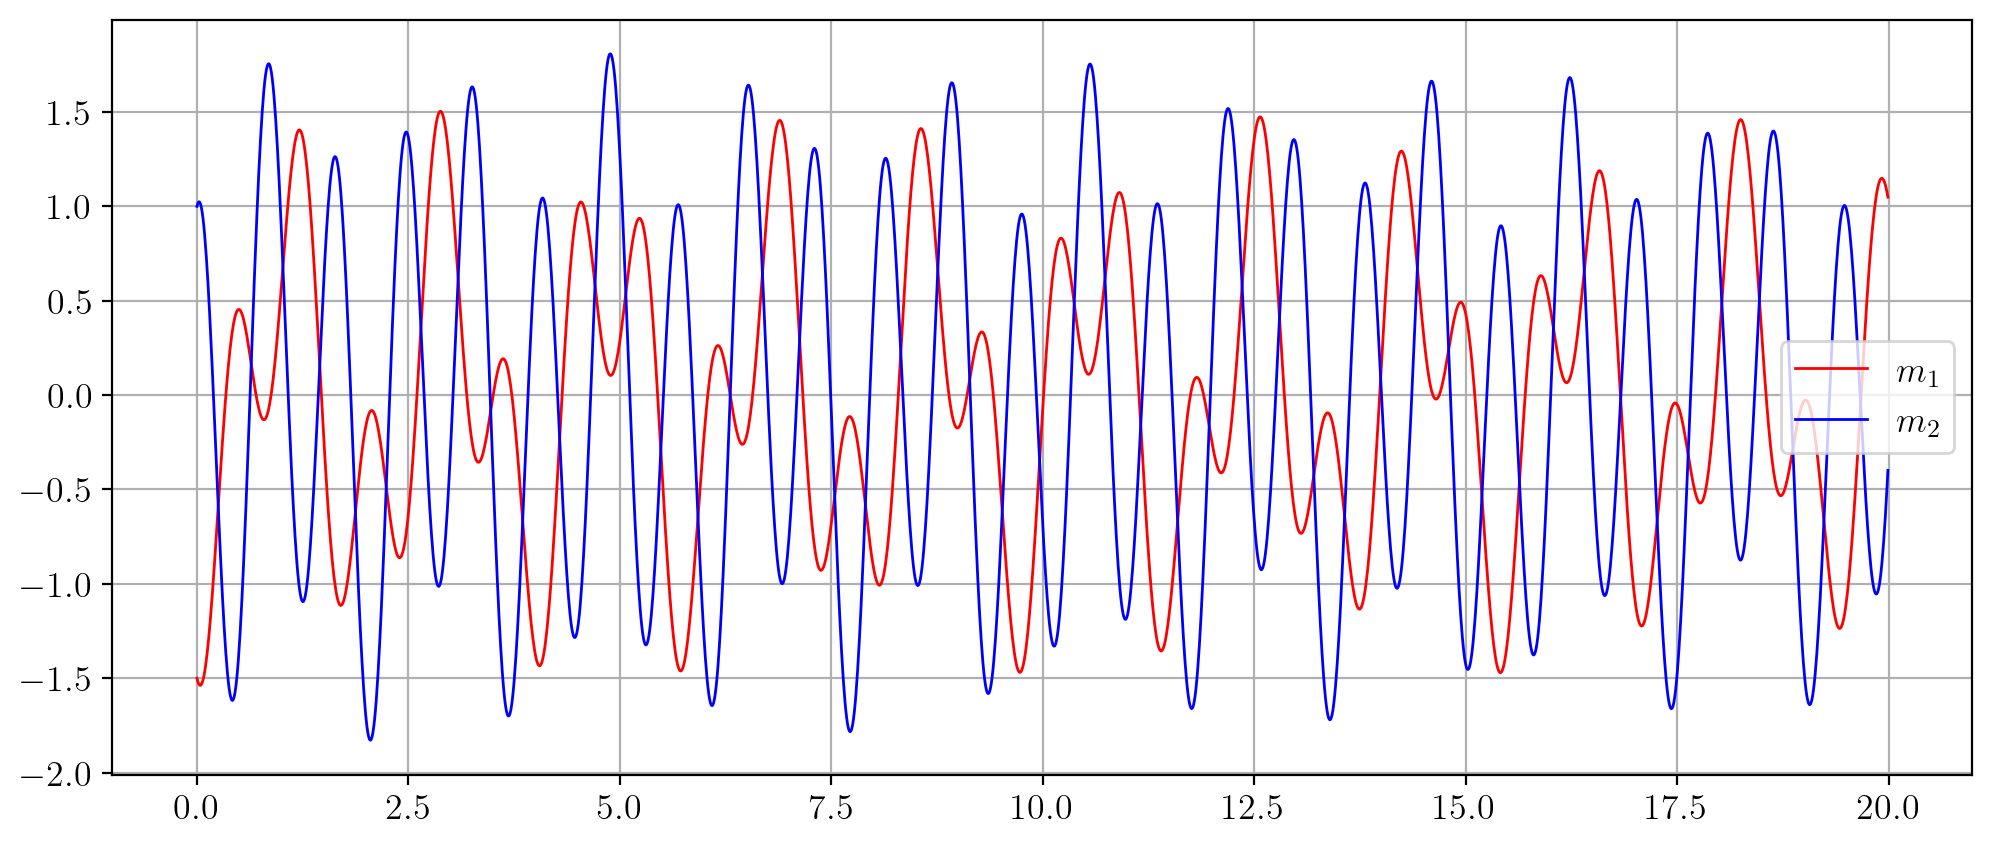

In [541]:
dt    = 0.01
t_end = 20
(k1, k2, k3) = (1,20,30)
(m1, m2)     = (1.0, 1.0)
(x1_i, x2_i) = (-1.5, 1)
(v1_i, v2_i) = (-2, 2)


(t, x1, x2, v1, v2) = Model(k=(k1, k2, k3),m=(m1, m2), t_end=t_end,x1_i=x1_i,x2_i=x2_i,v1_i=v1_i,v2_i=v2_i)

plt.plot(t, x1, color='red',  label='$m_1$')
plt.plot(t, x2, color='blue', label='$m_2$')
plt.legend(loc="right")
plt.grid()
plt.show()

Eigenmode
- Eigenvalues $\lambda$
$$
\lambda_1,\lambda_2 = \frac{\mathrm{tr}(\mathcal{F}) \pm \sqrt{\mathrm{tr}(\mathcal{F})^2-4\det({\mathcal{F}})}}{2},
$$
where
$$
\begin{aligned}
\mathrm{tr}(\mathcal{F}) &=-\frac{m_2k_1+\left(m_1+m_2\right)k_2+m_1k_3}{m_1m_2}
\\
\det(\mathcal{F}) &=\frac{k_1k_2+k_2k_3+k_3k_1}{m_1m_2},
\end{aligned}
$$

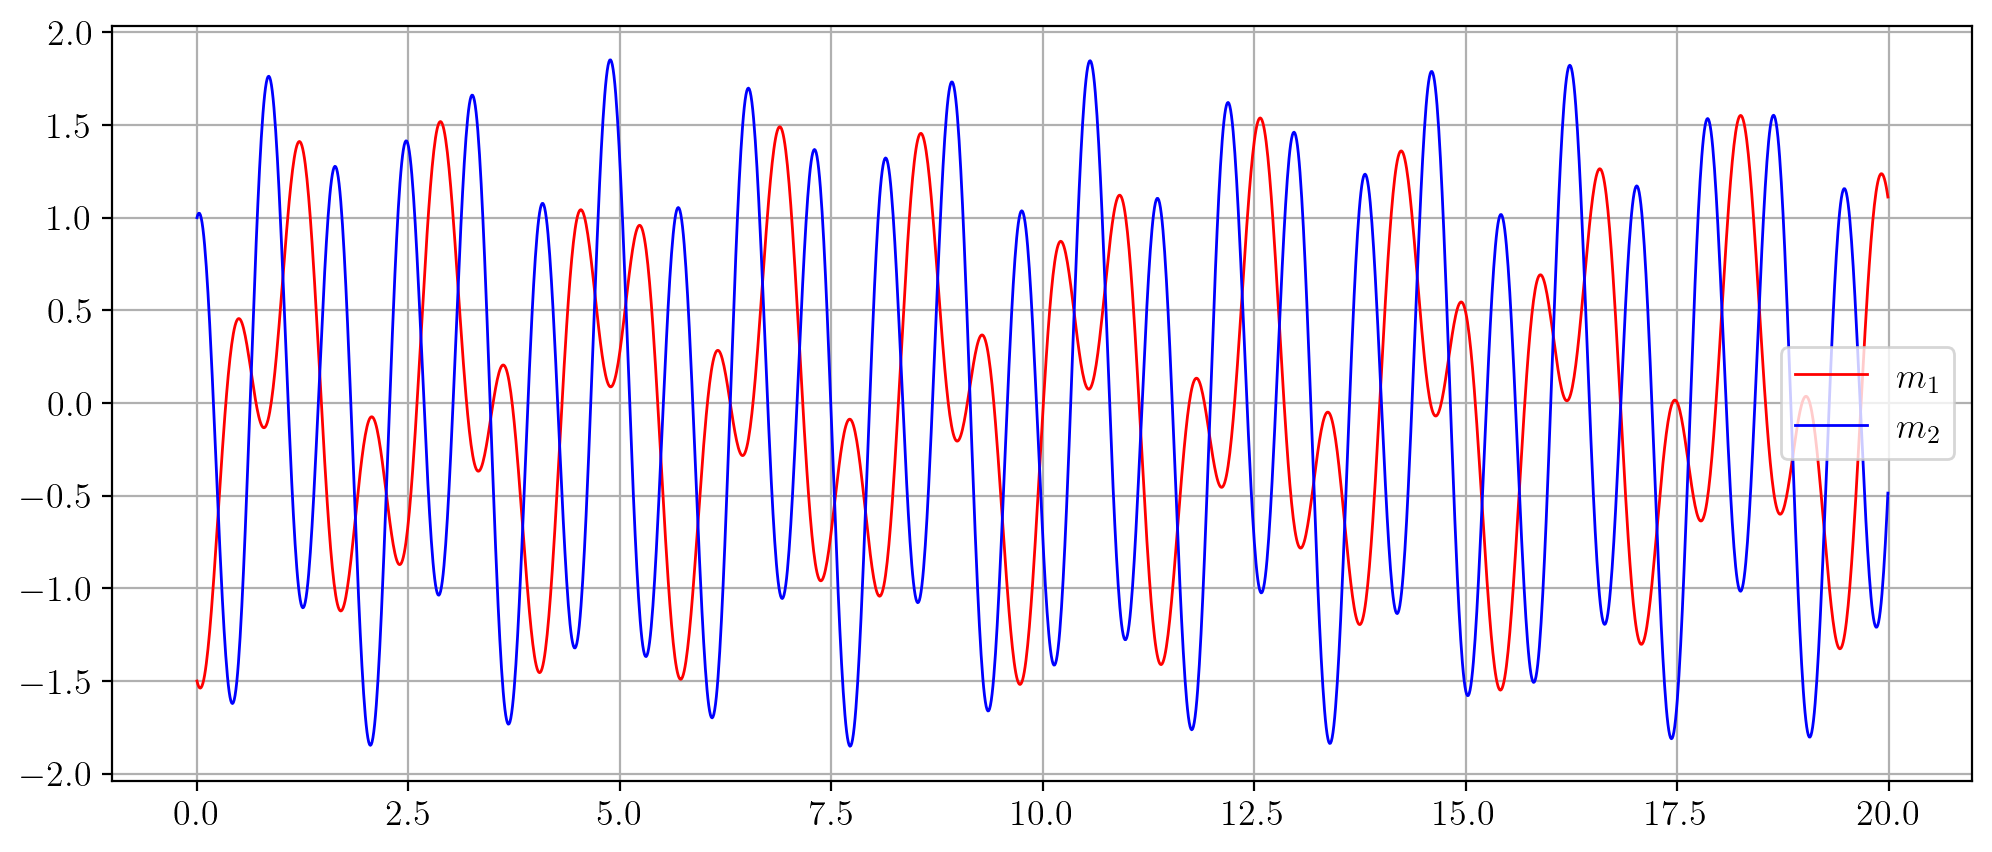

In [542]:
trF  = -(m2*k1+(m1+m2)*k2+m1*k3)/(m1*m2)
detF =  (k1*k2+k2*k3+k3*k1)/(m1*m2)
lda1 = (trF + sqrt(trF*trF - 4*detF))/2
lda2 = (trF - sqrt(trF*trF - 4*detF))/2

omega1 = sqrt(lda1+0j)
omega2 = sqrt(lda2+0j)
invOmega = array([[1.0/omega1,0.0], [0.0,1.0/omega2]])


mu1 = array([[m2*lda1+(k2+k3)], [k2]])
mu2 = array([[m2*lda2+(k2+k3)], [k2]])
Mu = np.hstack([mu1, mu2])
detMu = k2*m2*(lda1-lda2)
invMu = array([[k2,-m2*lda2-(k2+k3)],[-k2,m2*lda1+(k2+k3)]])/detMu


xi0 = array([[x1_i], [x2_i]])
vi0 = array([[v1_i], [v2_i]])

C = np.hstack([invMu@xi0, invOmega@invMu@vi0]) @ array([[0.5,0.5],[0.5,-0.5]])

(A1,B1,A2,B2) = (C[0,0],C[0,1],C[1,0],C[1,1])

psi = (A1*exp(omega1*t)+B1*exp(-omega1*t))*mu1 + (A2*exp(omega2*t)+B2*exp(-omega2*t))*mu2
psi1 = np.real(psi[0])
psi2 = np.real(psi[1])

plt.plot(t, psi1, color='red',  label='$m_1$')
plt.plot(t, psi2, color='blue', label='$m_2$')
plt.legend(loc="right")
plt.grid()
plt.show()

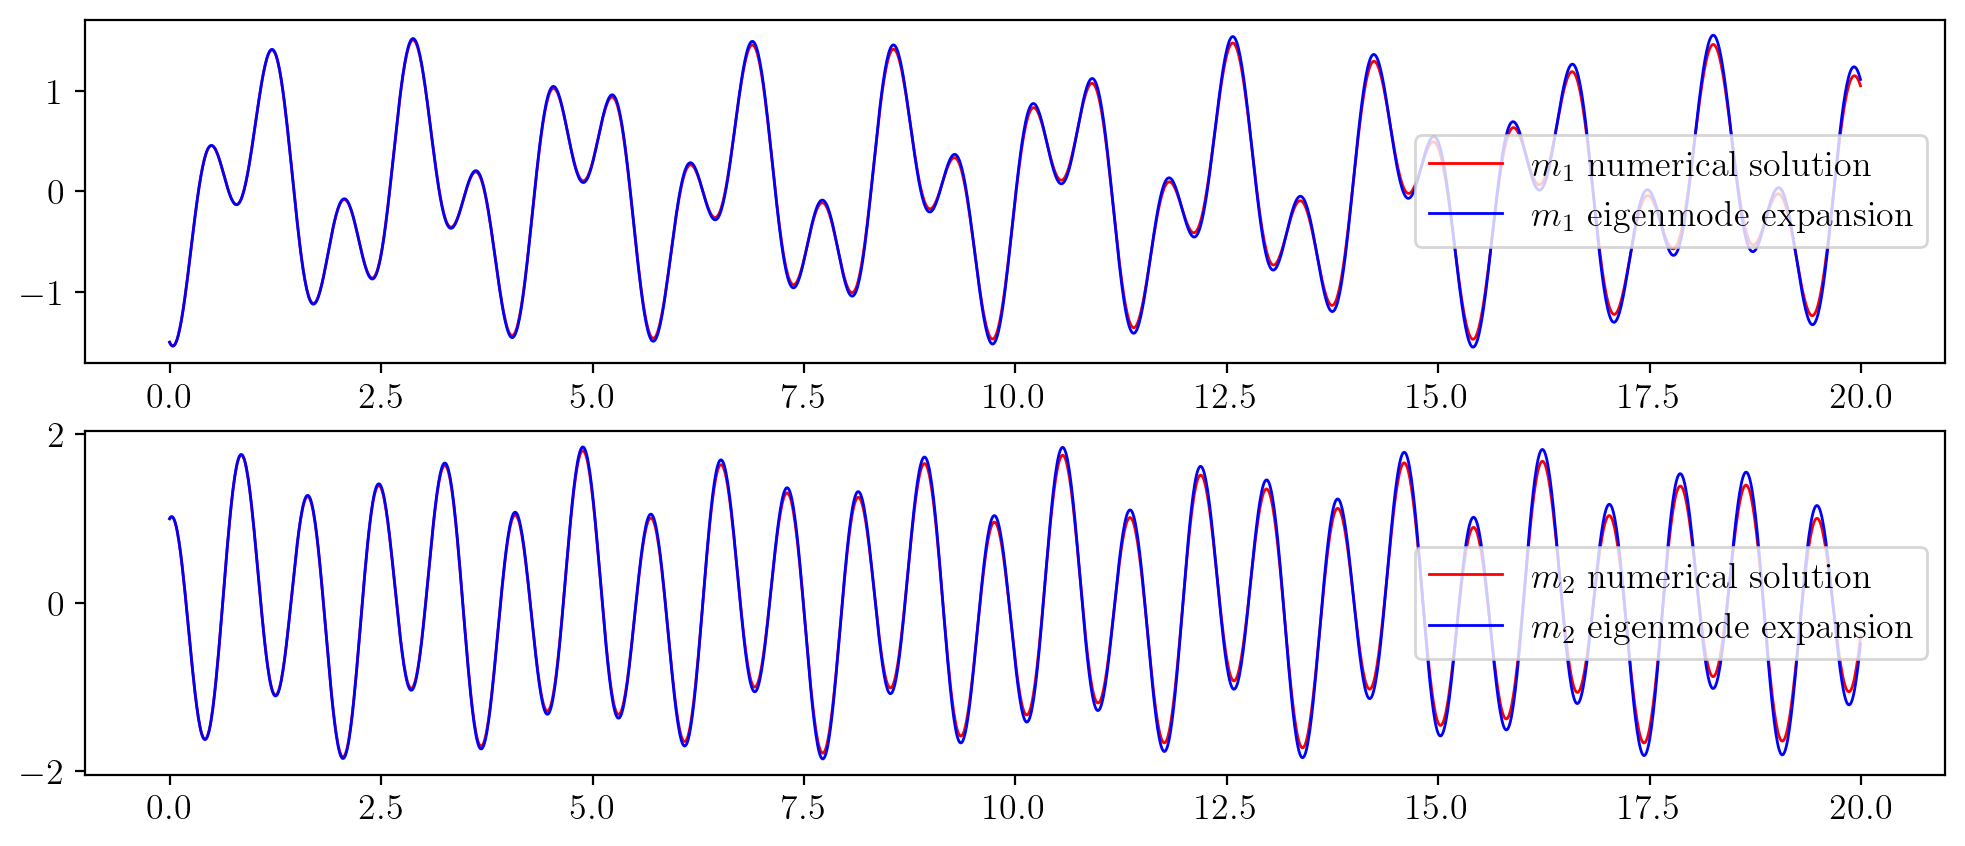

In [543]:
fig = plt.figure(figsize=(12,5),dpi=200)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(t,x1,color='red',label='$m_1$ numerical solution')
ax1.plot(t,psi1,color='blue',label='$m_1$ eigenmode expansion')

ax2.plot(t,x2,color='red',label='$m_2$ numerical solution')
ax2.plot(t,psi2,color='blue',label='$m_2$ eigenmode expansion')

ax1.legend(loc="right")
ax2.legend(loc="right")
plt.show()

## Comparison

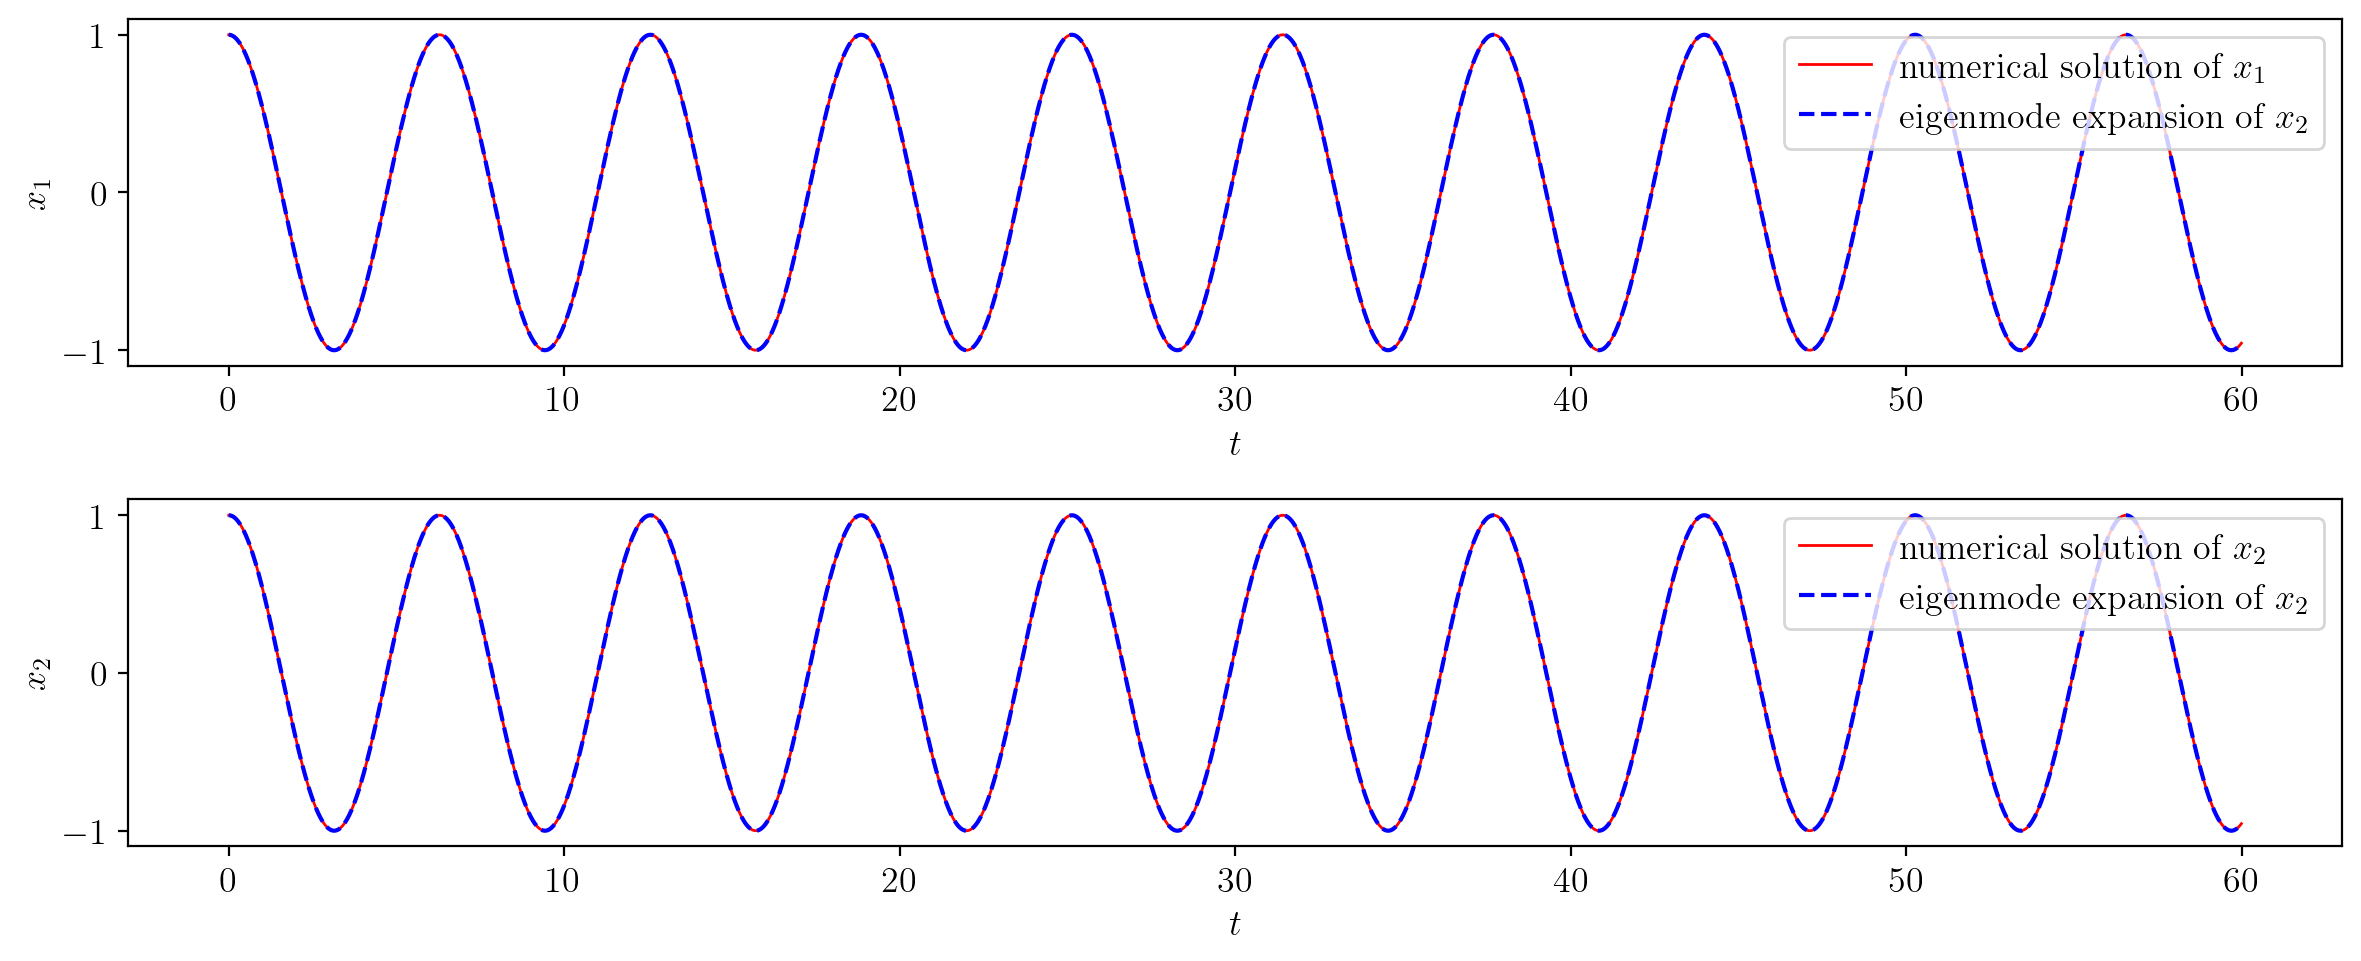

In [22]:
dt = 0.01
t_end=60
(k1, k2, k3) = (1.0, 1.0, 1.0)
(m1, m2) = (1.0, 1.0)
(x1_i,x2_i) = (1,1)

# numerical solution
(t, x1,x2,v1,v2) = Model(k=(k1, k2, k3),m=(m1, m2),dt=dt,t_end=t_end,x1_i=x1_i,x2_i=x2_i,v1_i=0,v2_i=0)
# Eigenmode expansion
trF  = -(m2*k1 + (m1+m2)*k2 + m1*k3)/(m1*m2)
detF =  (k1*k2 + k2*k3 + k3*k1)/(m1*m2)
(lda1,lda2) = ((trF +sqrt(trF*trF-4*detF))/2, (trF -sqrt(trF*trF-4*detF))/2)
(omega1,omega2) = (sqrt(-lda1),sqrt(-lda2)) 
(mu1,mu2) = (array([[m2*lda1+(k2+k3)], [k2]]),array([[m2*lda2+(k2+k3)], [k2]]))
M = np.hstack([mu1,mu2])
invM = inv(M)
C = invM@array([[x1_i],[x2_i]])
(C1,C2) = (C[0][0],C[1][0])
psi = C1*cos(omega1*t)*mu1 + C2*cos(omega2*t)*mu2
(psi1,psi2) = (psi[0],psi[1])

step1 = 30
# --- plot -----------------------------------------------------------------------------
fig = plt.figure(figsize=(12,5),dpi=200)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
marker1 = '-'
marker2 = '--'
zorder1 = 1
zorder2 = 2
linewidth1 = 1
linewidth2 = 1.5
ax1.plot(t,x1,marker1   ,color='red',  label='numerical solution of $x_1$',  linewidth=linewidth1,zorder=zorder1)
ax1.plot(t,psi1,marker2 ,color='blue', label='eigenmode expansion of $x_2$', linewidth=linewidth2,zorder=zorder2)

ax2.plot(t,x2,marker1   ,color='red',  label='numerical solution of $x_2$',  linewidth=linewidth1,zorder=zorder1)
ax2.plot(t,psi2,marker2 ,color='blue', label='eigenmode expansion of $x_2$', linewidth=linewidth2,zorder=zorder2)

[[[ax1,ax2][i].set_xlabel("$t$"),[ax1,ax2][i].set_ylabel(f"$x_{i+1}$")] for i in [0,1]]
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()